# <div align=center>EDA + Missing Values + Outlier + ML</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [158]:
df=pd.read_csv("Downloads/adult.csv")

### Description

The Dataset The Census Income dataset has 48,842 entries.<br>Each entry contains the following information about an individual: <br>● <b>age​</b>: the age of an individual ○ Integer greater than 0<br>● <b>workclass​</b>: a general term to represent the employment status of an individual ○ Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov, Without­pay, Never­worked.<br>● <b>fnlwgt​</b>: final weight. In other words, this is the number of people the census believes the entry represents.. ○ Integer greater than 0<br>● <b>education​</b>: the highest level of education achieved by an individual. ○ Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc, 9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.<br>● <b>education­num​</b>: the highest level of education achieved in numerical form. ○ Integer greater than 0<br>● <b>marital­status​</b>: marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
○ Married­civ­spouse, Divorced, Never­married, Separated, Widowed, Married­spouse­absent, Married­AF­spouse.<br>● <b>occupation​</b>: the general type of occupation of an individual ○ Tech­support, Craft­repair, Other­service, Sales, Exec­managerial, Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical, Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv, Armed­Forces.<br>● <b>relationship​</b>: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all ○ Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.<br>● <b>race​</b>: Descriptions of an individual’s race ○ White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.<br>● <b>sex​</b>: the biological sex of the individual ○ Male, Female<br>● <b>capital­gain​</b>: capital gains for an individual ○ Integer greater than or equal to 0<br>● <b>capital­loss​</b>: capital loss for an individual ○ Integer greater than or equal to 0<br>● <b>hours­per­week​</b>: the hours an individual has reported to work per week ○ continuous.<br>● <b> native­country​</b>: country of origin for an individual ○ United­States, Cambodia, England, Puerto­Rico, Canada, Germany, Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador, Trinadad&Tobago, Peru, Hong, Holand­Netherlands.<br>● <b>income​</b>: whether or not an individual makes more than $50,000 annually. ○ <=50k, >50k

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
## We see that there is no null or missing values since the missing values are represented as ? mark.
## So we will replace the ? mark with nan to show null values

In [9]:
data=df.replace('?',np.nan)

In [10]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
# Now we can see there are missing values in workclass,occupation and native-country.

### Univariate Analysis

In [12]:
df['age']

0        25
1        38
2        28
3        44
4        18
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 48842, dtype: int64

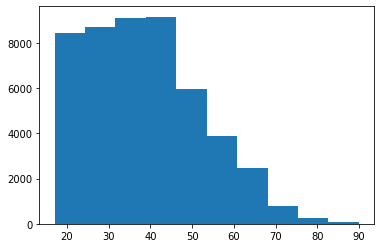

In [13]:
plt.hist(df['age'])
plt.show()

In [14]:
# From the histogram it signify that there are more no of people at the age of 40-50 yrs.

In [15]:
df['educational-num']

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: educational-num, Length: 48842, dtype: int64

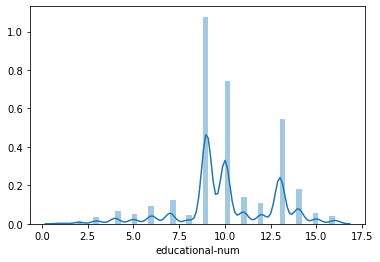

In [16]:
sns.distplot(df['educational-num'])

In [17]:
# From the graph it tells us that the highest level of education is around 8-9.

In [18]:
df['capital-gain']

0            0
1            0
2            0
3         7688
4            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital-gain, Length: 48842, dtype: int64

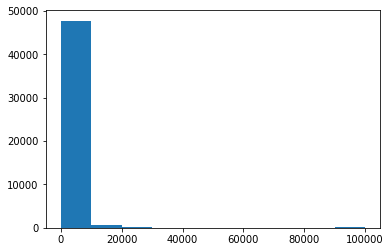

In [19]:
plt.hist(df['capital-gain'])
plt.show()

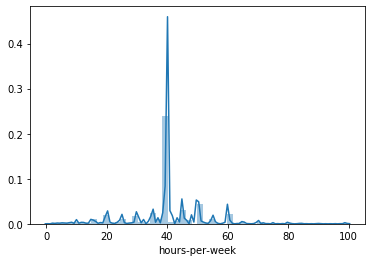

In [20]:
sns.distplot(df['hours-per-week'])

In [21]:
## From the graph it implies that the more than half of the people are working around 40 hrs/week.

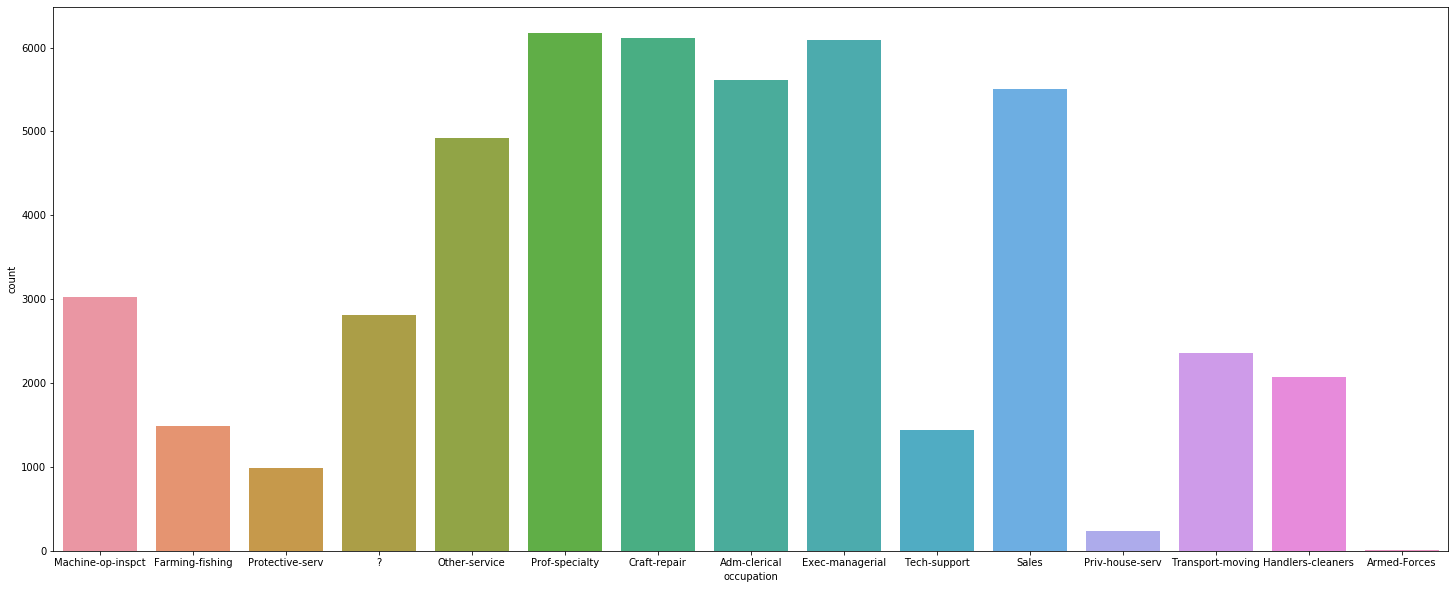

In [22]:
plt.figure(figsize=(25, 10))
sns.countplot(x='occupation', data=df)

In [23]:
# It is clear that there are more number of professional-speciality compared to other occupations.
# Here we see missing occupations inorder to remove that we will use data named dataset which we prepared after replacing missing values.

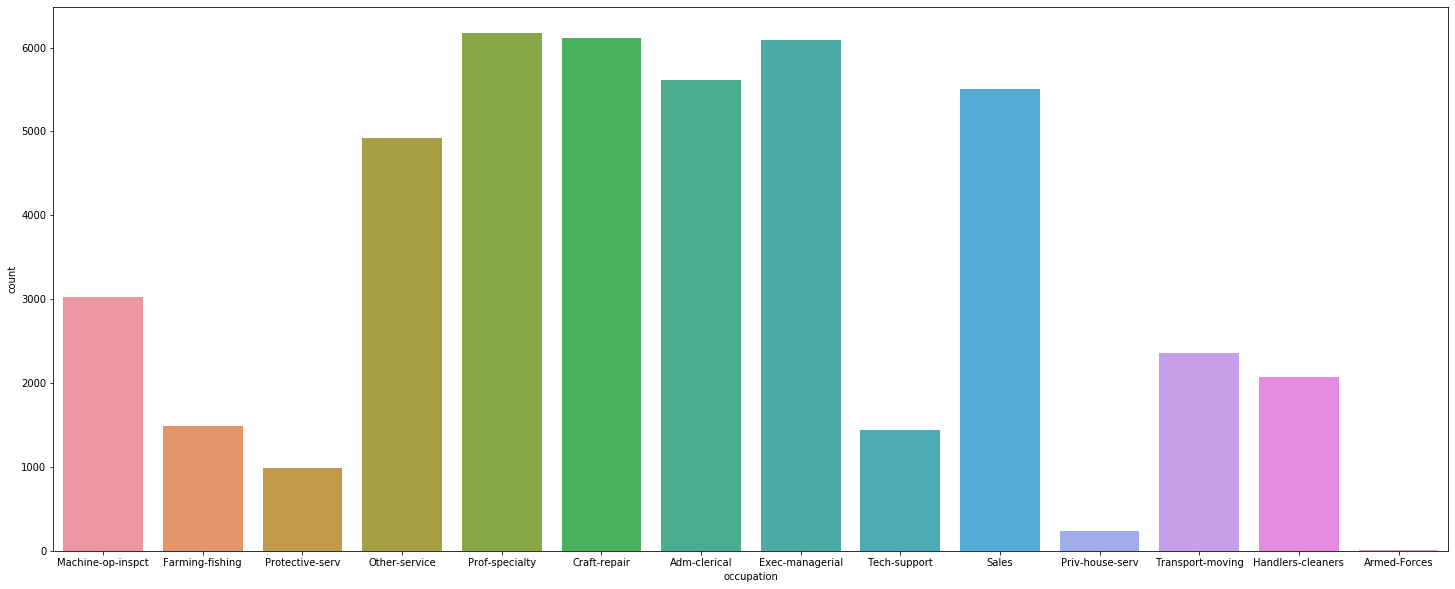

In [24]:
plt.figure(figsize=(25, 10))
sns.countplot(x='occupation', data=data)

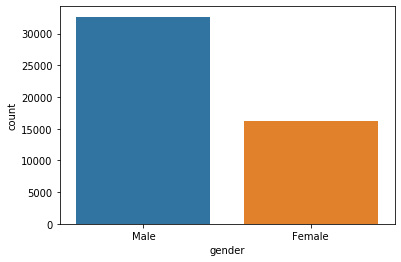

In [25]:
sns.countplot(df.gender)

In [26]:
# From the graph it shows that there are more no of males as compared to females.Males count is seeing to be more than double of female.

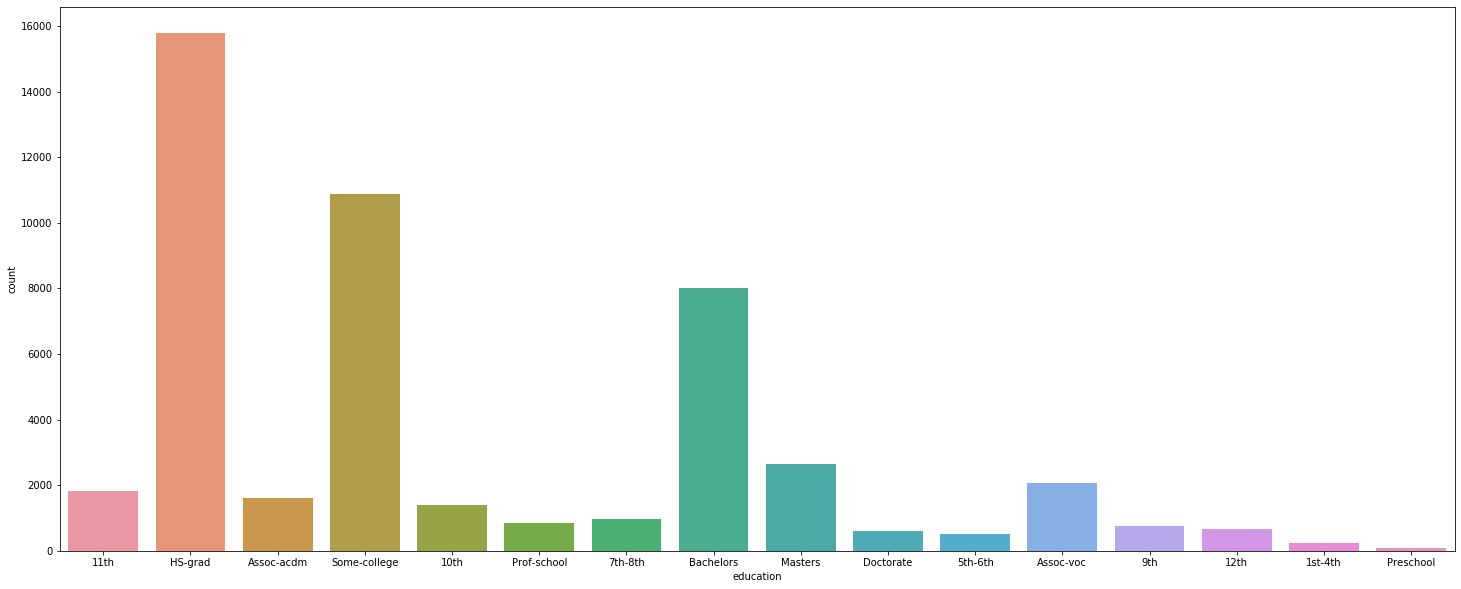

In [27]:
plt.figure(figsize=(25,10))
sns.countplot(df.education)

In [28]:
# From the plot it is clear that there are more no of High-School graduates.

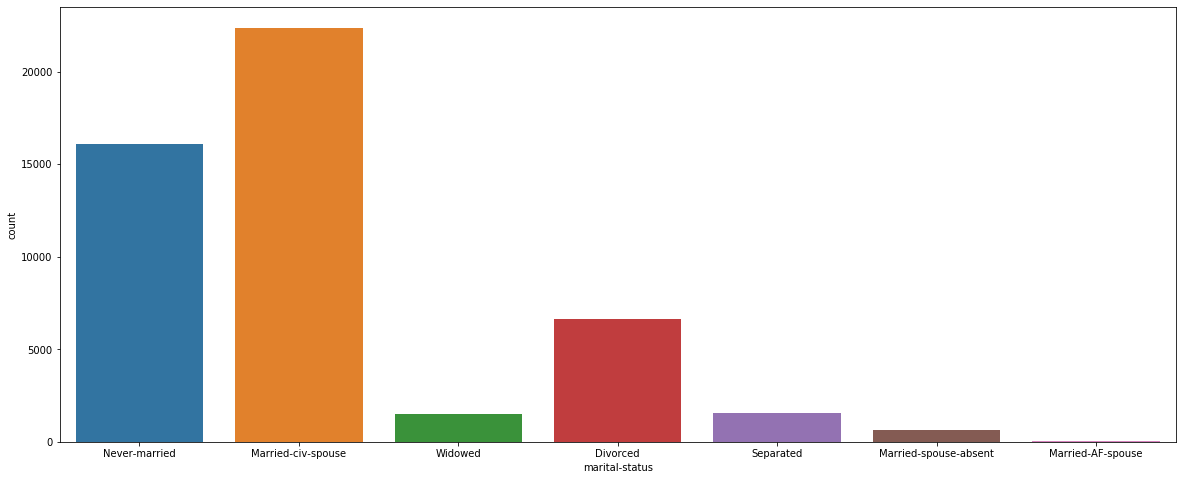

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(df['marital-status'])

In [30]:
# From the graph we see that there are more number of married civilian spouse followed by single(Never-married).

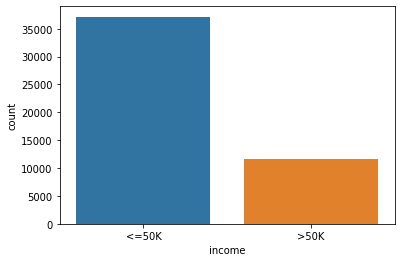

In [31]:
sns.countplot(df.income)

In [32]:
# Here the plot tells that there are more number of candidates earning less than RS.50000.

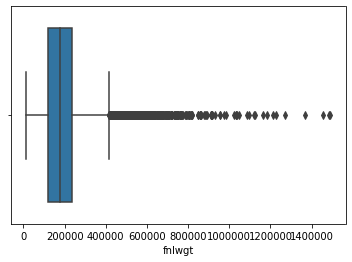

In [33]:
sns.boxplot(df['fnlwgt'])

In [34]:
# Here we used boxplot to represent the outliers and we see that mean final-weight is around 2 lakhs but there are more outliers ranging from 4 lakhs

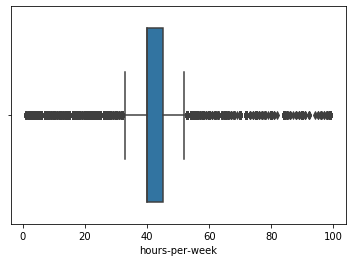

In [35]:
sns.boxplot(df['hours-per-week'])

In [36]:
# Similarly here see that the more no of people are working 40 hrs/week.But there are peoples who are working 0 hrs as well as 100 hrs.

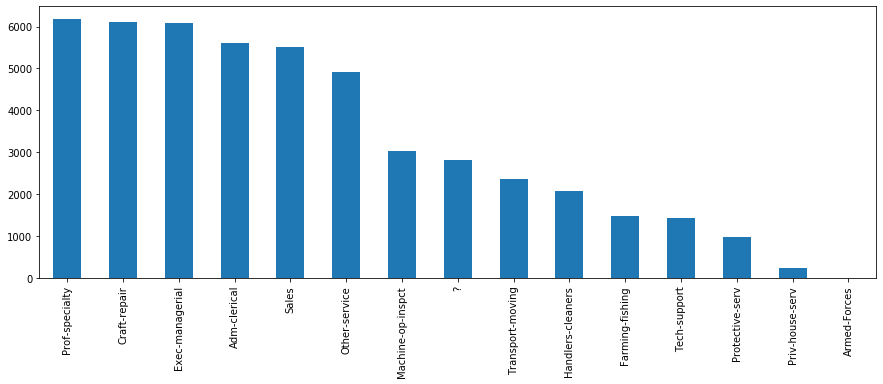

In [37]:
occu_freq = df['occupation'].value_counts()
occu_freq.plot(kind='bar', figsize=(15,5))

In [38]:
# The above frequency distribution tells that the prof-speciality have higher frequency and armed-forces have the lowest frequency.

### Bivariate Analysis

In [39]:
df['income'].replace({'<=50K':0,'>50K':1},inplace=True)

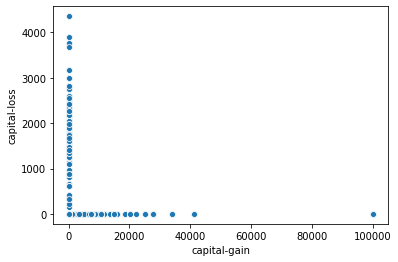

In [40]:
sns.scatterplot(x='capital-gain',y='capital-loss',data=df)

In [41]:
# Here from the plot we see that capital-gain and capital-loss are related to eachother.As the capital gain increases the capital loss decreases and vice-versa.

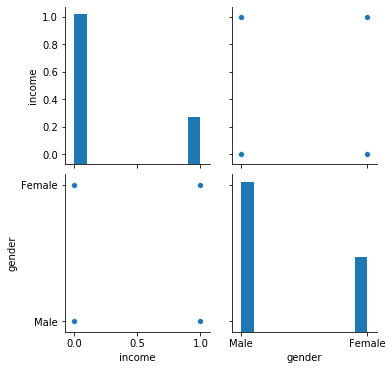

In [42]:
sns.pairplot(df,vars=['income', 'gender'])

In [43]:
# As we know that the no.of males are more compared to female the total income of male is also higher.But females are also earning equal amount as male.

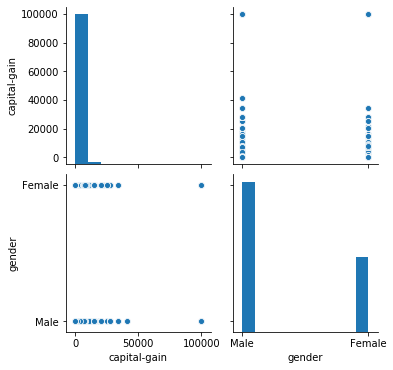

In [44]:
sns.pairplot(df,vars=['capital-gain', 'gender'])

In [45]:
# The capital-gain of a male is slightly higher than that of female it may be because the no.of males are comparitively higher.

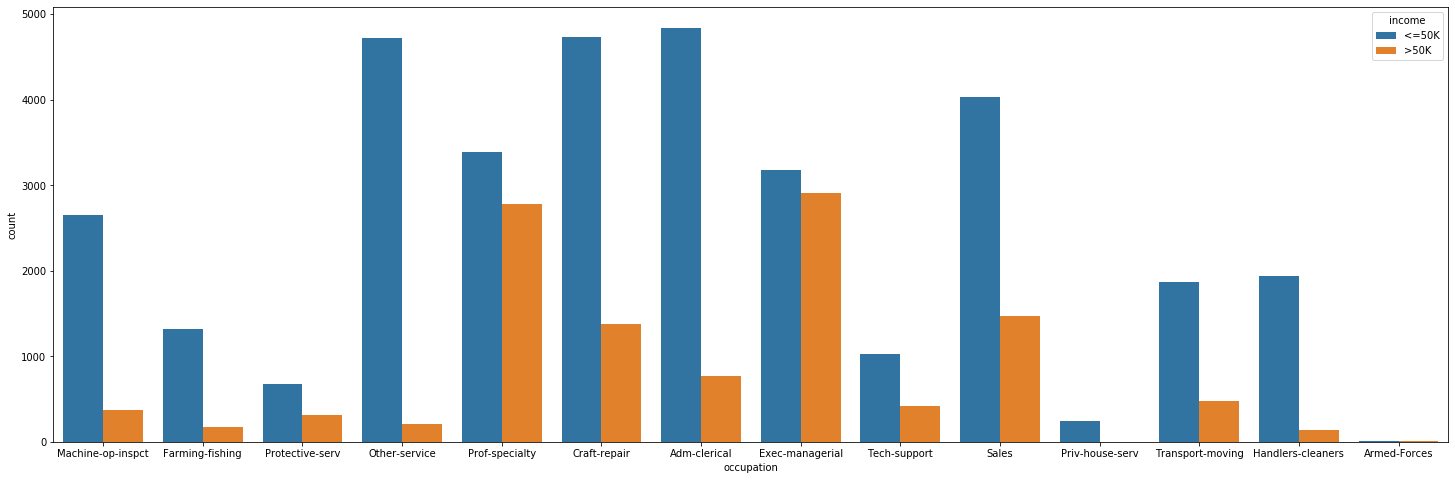

In [46]:
plt.figure(figsize=(25,8))
sns.countplot(x = data['occupation'], hue = data['income'])
plt.show()

In [47]:
# From this plot we find that the there are more no of candidates from craft-repair and admin-clerical are earning <50000.
# While more no of Exec-Manager and Prof are earning >50000.

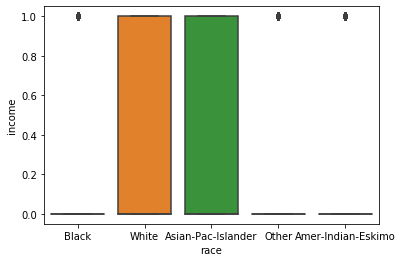

In [48]:
sns.boxplot(x='race',y='income',data=df)

In [49]:
#This gives clear impact that White and Asian-Pac-Islander are earning income while there are only few people from other races are earning more than >50000 as income.

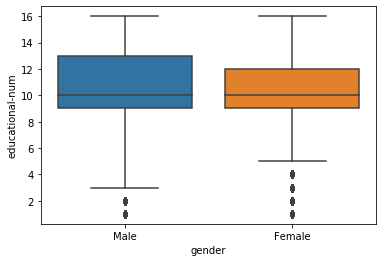

In [50]:
sns.boxplot(x='gender',y='educational-num',data=df)

In [51]:
#This plot emphasize that there are only few no of males having educational num less than 4 compared to female.

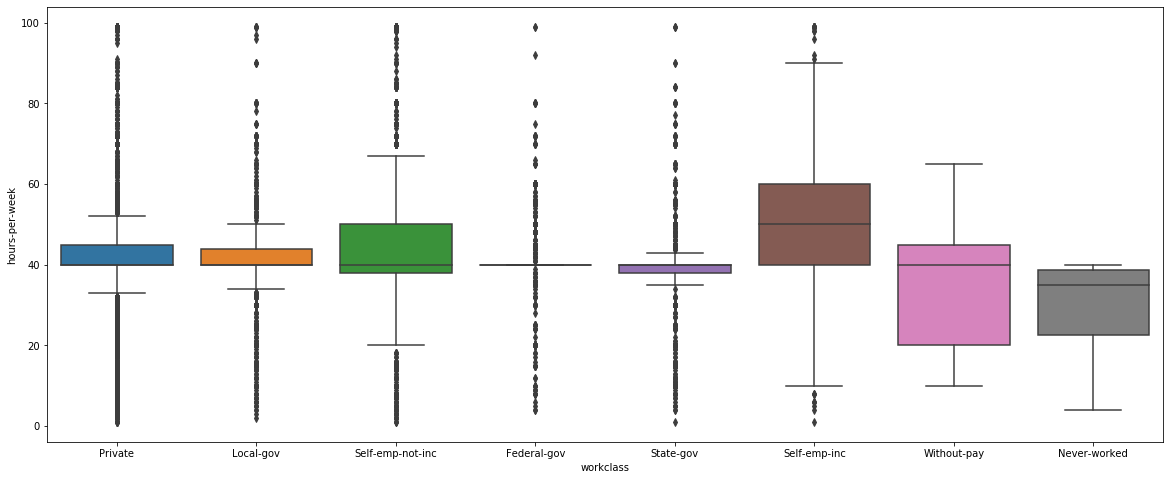

In [52]:
plt.figure(figsize=(20,8))
sns.boxplot(x='workclass',y='hours-per-week',data=data)
plt.show()

In [53]:
# From this plot we see that people are working all around from 0 to 100 hrs even though the avg is 40 hrs.

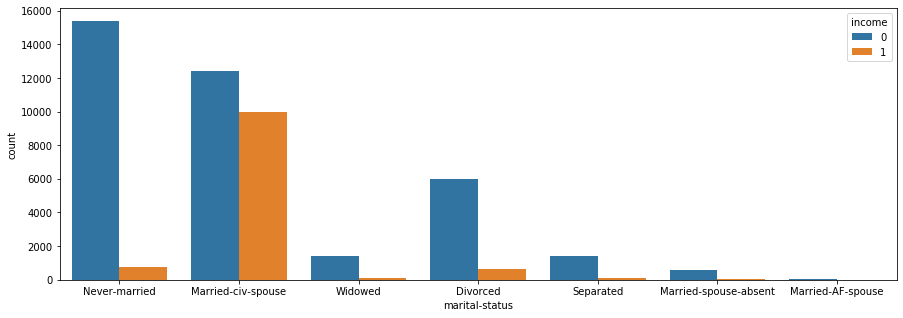

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(x = df['marital-status'], hue = df['income'])
plt.show()

In [55]:
#From the graph we see Married-Civilian is earning more compared to other.And most never married are earning less than 50K.

### Outliers

In [ ]:
## Now we will work on the outliers in age column.

In [144]:
outliers=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outliers.append(i)
    print("Outliers:",outliers,"\n")
    print("total:",len(outliers))
Zscore_outlier(df['age'])

Outliers: [80, 90, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 81, 80, 88, 87, 90, 83, 80, 90, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 81, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 81, 80, 83, 90, 90, 81, 90, 90, 80, 90, 90, 84, 90, 80, 90, 81, 83, 84, 81, 85, 82, 80, 90, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 90, 82, 81, 90, 84, 81, 82, 81, 80, 90, 80, 84, 82, 90, 84, 90, 83, 81, 80, 80, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 80, 82, 85, 80, 90, 81, 80, 81, 82, 88, 90, 82, 88, 84, 83, 86, 90, 90, 82, 83, 81, 90, 80, 81, 84, 84, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81] 

total: 186


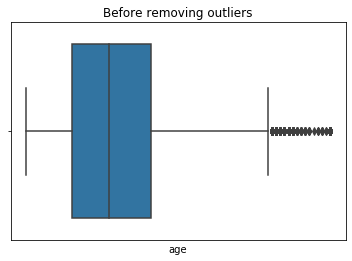

In [164]:
sns.boxplot().set_title('Before removing outliers')
sns.boxplot(df['age'])

In [ ]:
## Now we will use IQR to remove the outliers from age group.

In [167]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1
df=df[((df.age> (Q1 - 1.5 * IQR)) & (df.age < (Q3 + 1.5 * IQR)))]

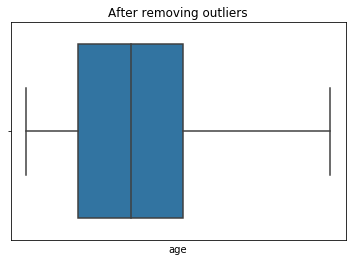

In [168]:
sns.boxplot().set_title('After removing outliers')
sns.boxplot(df.age)

In [ ]:
## Similarly we see the outliers in educational-numbers.

In [148]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out,"\n")
    print("Total:",len(out))
Winsorization_outliers(df['educational-num'])

Outliers: [2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1] 

Total: 322


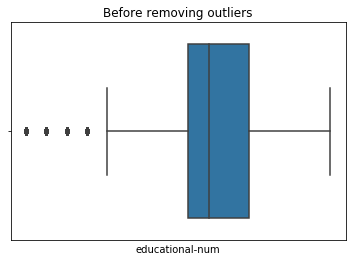

In [159]:
sns.boxplot().set_title('Before removing outliers')
sns.boxplot(df['educational-num'])

In [161]:
Q1 = df['educational-num'].quantile(0.25)
Q3 = df['educational-num'].quantile(0.75)
IQR = Q3 - Q1
df=df[((df['educational-num'] > (Q1 - 1.5 * IQR)) & (df['educational-num'] < (Q3 + 1.5 * IQR)))]

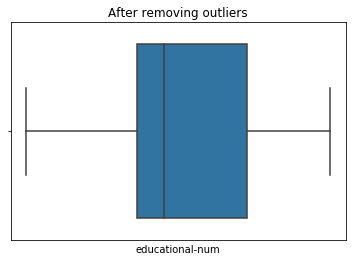

In [162]:
sns.boxplot().set_title('After removing outliers')
sns.boxplot(df['educational-num'])

In [ ]:
# Similarly we found that there are 2897 outliers in capital-loss and hours-per-week from below stats.

In [38]:
from scipy.stats import zscore
zabs = np.abs(zscore(df.loc[:,'capital-loss':'hours-per-week']))
print(np.shape(np.where(zabs >= 3)))
new_data = df[(zabs < 3).all(axis = 1)]
new_data

(2, 2897)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### Conclusion

1. From this EDA it is clear that there are high count of male than female.
2. Both male and female are earning same amount of income but the more no of > Rs.50K are earned by male it may be because of the count.
3. Married civilians are highly paid and also the prof-speciality occupation is getting high income.
4. Work-per-week is distributed all around 0-100hrs in all the work-class sector but the average time is 40hrs/week.
5. We see that there are more no of outliers in each column since it is real world data people with different criteria will be there.

### Feature Engineering

In [67]:
# Now we will work with the categorical data by replacing them into integers.

In [68]:
#education
data.replace({'education':{'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}},inplace=True)
#occupation
data.replace({'occupation':{ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}},inplace=True)
#relationship
data.replace({'relationship':{'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}},inplace=True)
#gender
data.replace({'gender':{'Male': 0, 'Female': 1}},inplace=True)
#race
data.replace({'race':{'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}},inplace=True)
#marital
data.replace({'marital-status':{'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}},inplace=True)
#wokclass
data.replace({'workclass':{'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3,'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6,'Never-worked':7}},inplace=True)

In [69]:
data.dropna(inplace=True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,5.0,226802,11,7,5,6.0,5,0,0,0,0,40,United-States,<=50K
1,38,5.0,89814,3,9,2,1.0,4,3,0,0,0,50,United-States,<=50K
2,28,4.0,336951,9,12,2,14.0,4,3,0,0,0,40,United-States,>50K
3,44,5.0,160323,0,10,2,6.0,4,0,0,7688,0,40,United-States,>50K
5,34,5.0,198693,13,6,5,13.0,0,3,0,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,5.0,257302,9,12,2,2.0,1,3,1,0,0,38,United-States,<=50K
48838,40,5.0,154374,3,9,2,6.0,4,3,0,0,0,40,United-States,>50K
48839,58,5.0,151910,3,9,1,3.0,3,3,1,0,0,40,United-States,<=50K
48840,22,5.0,201490,3,9,5,3.0,5,3,0,0,0,20,United-States,<=50K


## Machine Learning Algorithms:

In [70]:
data['income'].replace({'<=50K':0,'>50K':1},inplace=True)

In [72]:

new_x = pd.DataFrame(np.c_[data['workclass'], data['education'], data['marital-status'], data['occupation'], data['relationship'], 
                          data['race'], data['gender']
                          ],
                    columns = ['workclass','education','marital-status','occupation','relationship','race','gender'])
#Y axis = Our dependent variable or the income of adult i.e Income
new_y = pd.DataFrame(data.income)

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [75]:
logR = LogisticRegression()

In [116]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.35, random_state=1)

In [117]:
logR.fit(x_train, y_train)

C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [118]:
y_pred = logR.predict(x_test)

In [119]:
from sklearn import metrics
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_recall_fscore_support(y_test, y_pred)[0])
print("recall:",metrics.precision_recall_fscore_support(y_test, y_pred)[1])
print("fscore:",metrics.precision_recall_fscore_support(y_test, y_pred)[2])
print("support:",metrics.precision_recall_fscore_support(y_test, y_pred)[3])

Accuracy: 75.32853171594643
Precision: [0.77957405 0.5196752 ]
recall: [0.9351602  0.20967742]
fscore: [0.85030858 0.29879691]
support: [11860  3968]


### DecisionTree

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train,y_train)
y_pred1=dtc.predict(x_test)

In [121]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)
print("Precision:",metrics.precision_recall_fscore_support(y_test, y_pred1)[0])
print("recall:",metrics.precision_recall_fscore_support(y_test, y_pred1)[1])
print("fscore:",metrics.precision_recall_fscore_support(y_test, y_pred1)[2])
print("support:",metrics.precision_recall_fscore_support(y_test, y_pred1)[3])

Accuracy: 81.70331058882992
Precision: [0.85610996 0.66533004]
recall: [0.90851602 0.54359879]
fscore: [0.88153481 0.59833564]
support: [11860  3968]


### RandomForest

In [122]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred2=rfc.predict(x_test)

C:\Users\selvakumar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)
print("Precision:",metrics.precision_recall_fscore_support(y_test, y_pred2)[0])
print("recall:",metrics.precision_recall_fscore_support(y_test, y_pred2)[1])
print("fscore:",metrics.precision_recall_fscore_support(y_test, y_pred2)[2])
print("support:",metrics.precision_recall_fscore_support(y_test, y_pred2)[3])

Accuracy: 82.15820065706343
Precision: [0.85834391 0.67763975]
recall: [0.91247892 0.54989919]
fscore: [0.88458395 0.60712298]
support: [11860  3968]


In [124]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [125]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()),  
          ('DecTree', DecisionTreeClassifier()),
         ('Rand_Forest',RandomForestClassifier())]

In [126]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=None)
    results = model_selection.cross_val_score(model,new_x,new_y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

LogReg| Mean=0.755031 STD=0.005058
DecTree| Mean=0.818650 STD=0.003875


C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\selvakumar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: 

Rand_Forest| Mean=0.821835 STD=0.003220


1. LogReg| Mean=0.755031 STD=0.005058
2. DecTree| Mean=0.818650 STD=0.003875
3. Rand_Forest| Mean=0.821835 STD=0.003220

### Conclusion On ML:

<UL><p>From the above 3 classifier Random_Forest gives the best outcome with higher mean and less deviation compare to other classifiers.</p>
<p>And also Random_forest provides better precision,recall and fscore.</p></UL>